# Exercise 3: Monte Carlo

## 1. Sample the configurations of a particle in 1D subject to a harmonic potential U(x)=1/2 kq^2 at temperature kT=1.

### Moves should be proposed using random numbers uniformly distributed in [−∆, +∆] and accepted or rejected with a Metropolis procedure.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stt
from scipy.optimize import curve_fit
import numpy as np
import random as rm

In [2]:
# uniform distribution [-delta,+delta]
def trial(x,delta):
    return x+(rm.random()*2-1)*delta ## there is also np.random.rand()

In [3]:
# potential energy
def u(x,k=1):
    return 1/2*k*x**2

In [9]:
def run(*,kT=1,delta=1,nsteps=100,q=0.1):

    traj=[]
    time=[]
    q2mean=0
    avalpha=0


#q=0.1
    traj.append(q)
    time.append(0)
    u0=u(q)

    for istep in range(nsteps):
        qtry=trial(q,delta)
        utry=+u(qtry)
        alpha=np.exp(-(utry-u0)/kT)
        if alpha>1: alpha=1
        if alpha>rm.random():
            avalpha+=1
            q=+qtry
            u0=+utry
        #trajectory.append(u)
        q2mean+=q**2
        traj.append(q)
        time.append(istep)

    avalpha=avalpha/nsteps
    q2mean=q2mean/nsteps
    

    return np.array(time),np.array(traj),avalpha,q2mean

average acceptance:  0.9814
position variance (q2 mean):  0.7433550709864362


Text(0.5, 1.0, 'Histogram')

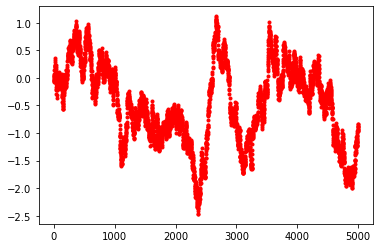

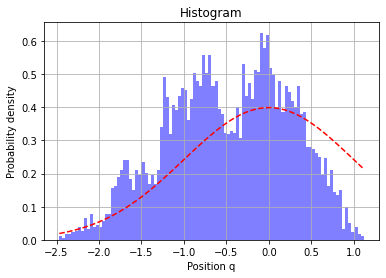

In [10]:
kT=1
nsteps=5000
time,traj,avalpha,q2mean=run(kT=kT,q=0,delta=0.1,nsteps=nsteps) ## see what happens for delta=30 and nsteps=10^3
print('average acceptance: ',avalpha)
print('position variance (q2 mean): ',q2mean)
plt.plot(time,traj,'.r',label='trajectory')

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(traj, nbins,density=True,facecolor='blue', alpha=0.5)
plt.grid(axis='both')
#plt.show()


# add a 'best fit' line
y = stt.norm.pdf(bins, 0, np.sqrt(kT))
plt.plot(bins, y, 'r--')
plt.xlabel('Position q')
plt.ylabel('Probability density')
plt.title('Histogram')

In [11]:
niter=50
q2means=[]

for i in range(niter):
    time,traj,avalpha,q2mean=run(q=0,delta=0.5,nsteps=1000)
    q2means.append(q2mean)

#print(q2means)
q2=np.mean(q2means)
std=np.std(q2means)/np.sqrt(niter)
print(q2)
print(std)

0.969251483962379
0.030687635375900725


### Try different values of ∆ (e.g. ∆ = 0.01, 0.1, 1) and different values of the initial condition q.

[0.009814913166945558, 0.01569858680383075, 0.25137808109082665, 1.018593098809316, 1.7066946678314665, 0.2846090519862444]
[1.0, 1.0, 0.98, 0.88, 0.19, 0.04]


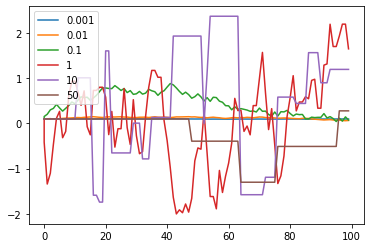

In [8]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=100

for delta in (0.001,0.01,0.1,1,10,50):  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    plt.plot(time,traj,'-',label=delta)
    
plt.legend(loc='upper left')

print(q2s)
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

[0.8564270117116645, 0.8654963833465563, 1.2425125070871057, 0.5567543000516417, 1.6464321226172163]
[0.0010211131850625756, 0.0011444445927125163, 0.0017765749012934374, 0.0007471930362392909, 0.0038150696026927155]
[0.998125, 0.99815, 0.99772, 0.998471, 0.997677]


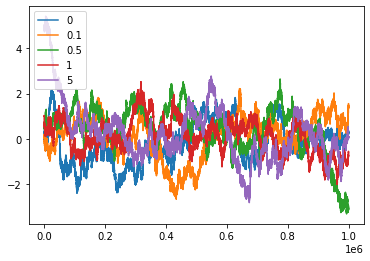

In [60]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=1000000

for q0 in (0,0.1,0.5,1,5):  
    time,traj,avalpha,q2=run(q=q0,nsteps=nsteps,delta=0.01)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    #q2s.append(q2)
    plt.plot(time,traj,'-',label=q0)
    
plt.legend(loc='upper left')

print(q2s)
print(q2stds)
print(avalphas)

[1.0603642664786486, 0.9981134928814268, 1.0927509615970117, 0.8961436194899428, 1.0406396979793289]


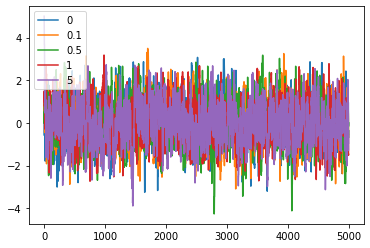

In [109]:
q2s=[]
avalphas=[]

for q0 in (0,0.1,0.5,1,5):  
    time,traj,avalpha,q2=run(q=q0,nsteps=5000,delta=1)
    avalphas.append(avalpha)
    q2s.append(q2)
    plt.plot(time,traj,'-',label=q0)
    
plt.legend(loc='upper left')

print(q2s)

# it seems quite independent from the choice of the initial position (??)

## 2. Plot the resulting trajectory (i.e. q as a function of the number of iteration) for different values of ∆. Also compute the average acceptance as a function of ∆.

[0.011268421873830968, 0.00841418664530654, 0.0016877288792984313, 0.03624488985058337, 0.01356957964756056, 0.16630999614983177, 0.5438038585965965, 1.2551912679263932, 0.947087968208516, 0.976767530533561, 0.7864254113057088, 0.9570667912817691, 1.0083856132713305, 0.9843717493536019, 0.8774369461638452, 1.004434527123043, 1.2052059355923757, 0.7252438383604981, 0.7718995497961184, 0.9043063034502825, 0.7353119922549095, 1.2628595680029024, 1.1407432696653905]
[1.0, 1.0, 1.0, 1.0, 0.998, 0.995, 0.989, 0.959, 0.943, 0.898, 0.864, 0.809, 0.811, 0.703, 0.63, 0.298, 0.161, 0.072, 0.03, 0.036, 0.024, 0.025, 0.01]


/tmp/ipykernel_3395/1137663461.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


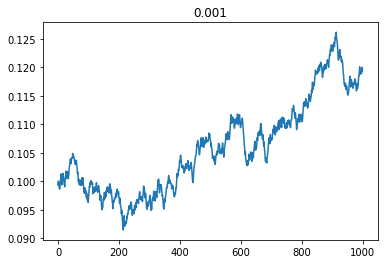

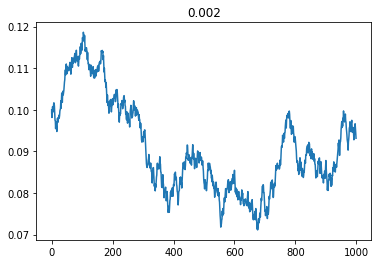

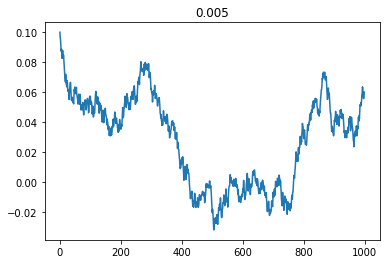

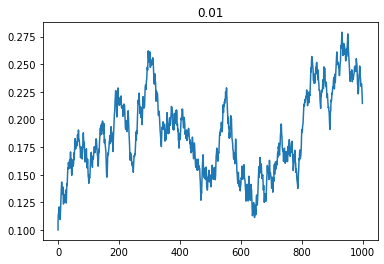

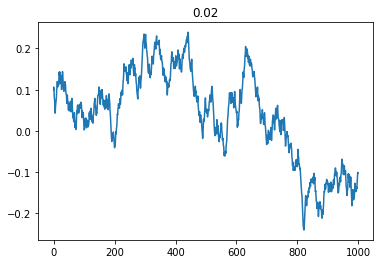

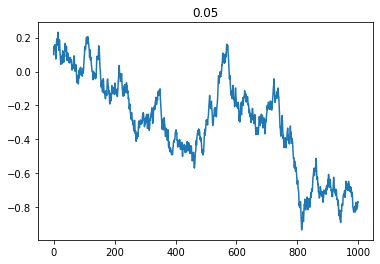

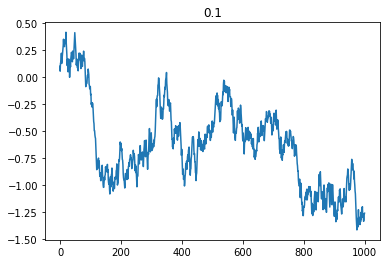

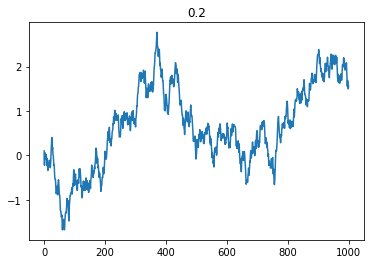

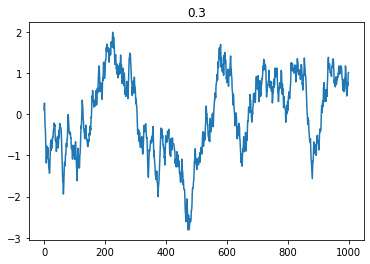

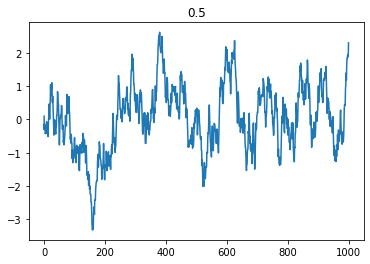

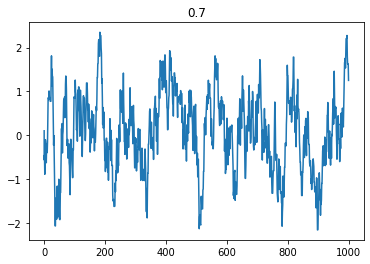

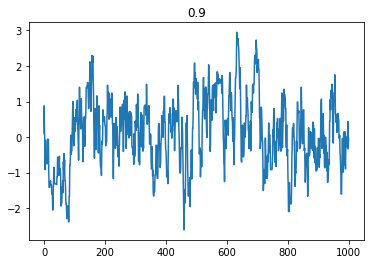

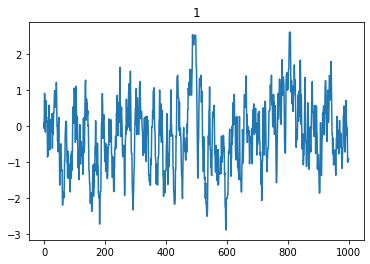

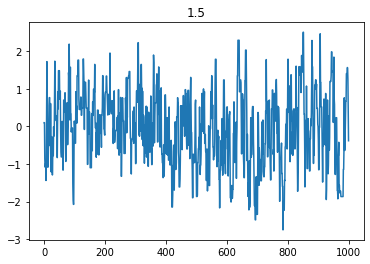

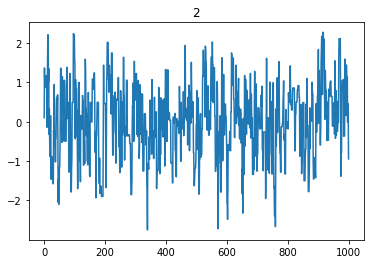

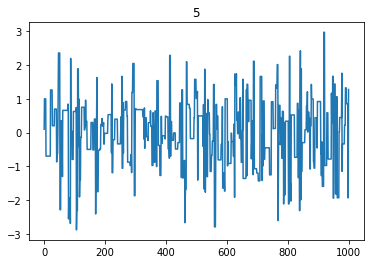

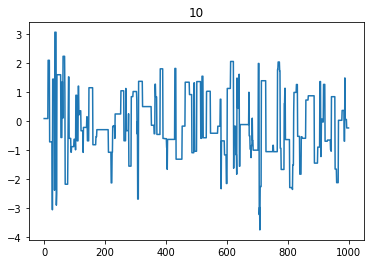

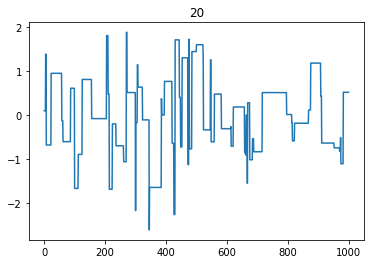

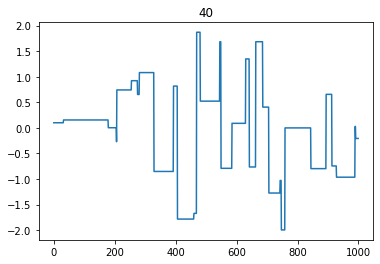

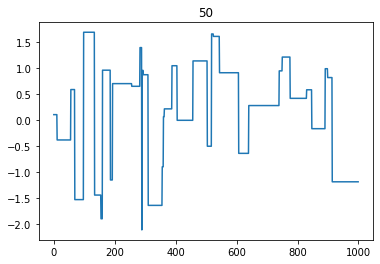

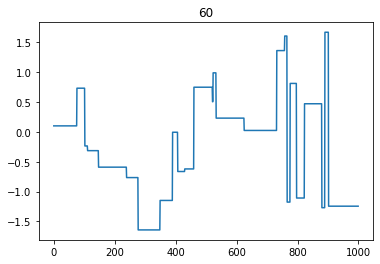

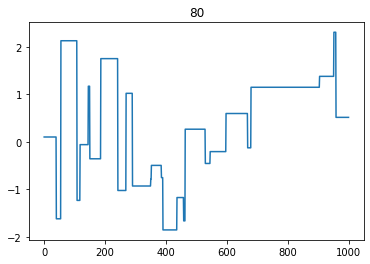

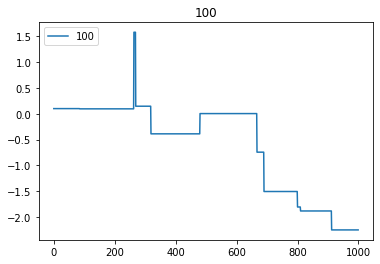

In [14]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=1000
deltas=(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7,0.9,1,1.5,2,5,10,20,40,50,60,80,100)

for delta in deltas:#(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7,0.9,1,1.5,2,5,10,20,50,100):  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps,kT=1)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    plt.figure()
    plt.plot(time,traj,'-',label=delta)
    plt.title(delta)
    
    
plt.legend(loc='upper left')

print(q2s)
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

[0.97066994 0.24047374 0.03415581]
[[ 5.64622249e-05 -1.39681016e-06 -3.45397359e-05]
 [-1.39681016e-06  5.14056442e-05  1.83160611e-05]
 [-3.45397359e-05  1.83160611e-05  3.69927720e-05]]


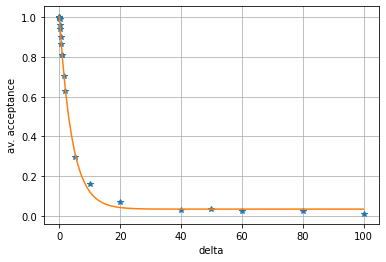

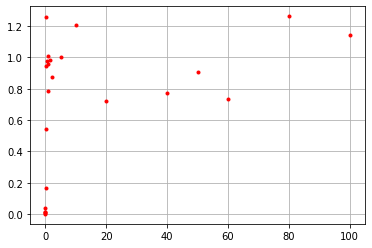

In [15]:
# plot of alpha(delta) and (average) q^2(delta) for nsteps and q0 fixed
plt.figure(1)
plt.plot(deltas,avalphas,'*')
plt.grid(axis='both')
plt.xlabel('delta')
plt.ylabel('av. acceptance')

def funcexp(x,a,b,c):
    return a*np.exp(-b*x)+c

popt,pcov=curve_fit(funcexp,deltas,avalphas,[1,1,0]) # popt optimal parameters, pcov the covariance matrix
# delta_arr=np.array(deltas)
delta_arr=np.linspace(0,100,101)
# print(delta_arr)
plt.plot(delta_arr, funcexp(delta_arr, popt[0], popt[1],popt[2]))#, popt[2]),label='Fitted function')
print(popt)
print(pcov)

#x=np.array([0.0,1.0,2.0])
#y=m*x+q
#plt.plot(x,y,'-r')
#plt.ylabel('average acceptance')
#plt.xlabel('delta')
#print('m = ',m)
#print('q = ',q)

plt.figure(2)
plt.plot(deltas,q2s,'.r')
plt.grid(axis='both')




## 3. Compute the average value of q^2. Check how many iterations you need to reach an estimate of this integral with a given accuracy.
### How is the accuracy scaling with the length of the simulation?

In [16]:
q2s=[]
avalphas=[]
q2=0
niter=1000
l=1

for icount in range(niter):
    time,traj,avalpha,q2=run(delta=2)#q=l*rm.random())
    q2s.append(q2)
    avalphas.append(avalpha)

q2mean=np.mean(q2s)
q2std=np.std(q2s)/np.sqrt(niter)
print(q2mean)
print(q2std)
avalphamean=np.mean(avalphas)
avalphastd=np.std(avalphas)/np.sqrt(niter)
print(avalphamean)
print(avalphastd)

0.9937263538421192
0.009679870065024932
0.633
0.001555892027102138


Fix the number of iterations niter and change delta: how does the acceptance and q2 depend on delta?
Initial condition q(0)=0 (minimum of the potential)

In [17]:
deltas="0.001 0.01 0.1 1".split()
ndeltas=4

q2s=[]
avalphas=[]
niter=100 #000

for jcount in range(ndeltas):
    delta=deltas[jcount]
    for icount in range(niter):
        time,traj,avalpha,q2=run(delta=delta)
        q2s[jcount,icount]+=q2
        avalphas[jcount,icount]+=avalpha

q2mean=np.mean(q2s)
q2std=np.std(q2s)/np.sqrt(niter)
print(q2mean)
print(q2std)

TypeError: can't multiply sequence by non-int of type 'float'

[0.31703639307683895, 0.38379365313804137, 1.199787983845386, 0.8987191475680463, 0.7619482540118407, 1.2966094536736086, 0.9795626741004954, 1.1157936973909577, 1.035876618189099, 0.9591430269203038, 0.9222587171399313, 1.0436403971503896, 1.0328486866561668, 0.9385301802370092, 0.989473645578349]
[0.682963606923161, 0.6162063468619586, 0.19978798384538599, 0.10128085243195373, 0.23805174598815926, 0.2966094536736086, 0.020437325899504644, 0.11579369739095768, 0.03587661818909904, 0.04085697307969616, 0.07774128286006865, 0.04364039715038959, 0.0328486866561668, 0.06146981976299082, 0.010526354421650952]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


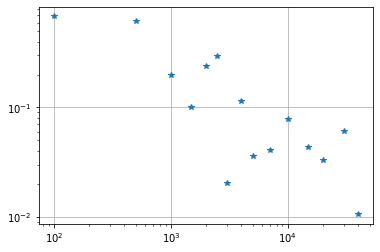

In [20]:
avalphas=[]
stdalphas=[]
avq2s=[]
error=[]
stdq2s=[]
#nsteps=(100,200,400,500,700,800,1000,1300,1700,2000,2300,2700,3000,3300,3700,4000,4300,4700,5000)#,8000,10000,15000,20000)#,50000,100000)#,1000000)
#nsteps=(100,200,500,1000,2000,5000,10000,20000,50000,100000)
nsteps=(100,500,1000,1500,2000,2500,3000,4000,5000,7000,10000,15000,20000,30000,40000)
delta=0.5
niter=1 ## niter to compute the average value of the acceptance

for nstep in nsteps:
    q2s=[]
    alphas=[]
    for icount in range(niter):
        time,traj,avalpha,q2=run(delta=delta,nsteps=nstep)
        alphas.append(avalpha)
        q2s.append(np.mean(traj**2))
    avalphas.append(np.mean(alphas))
    stdalphas.append(np.std(alphas)/np.sqrt(niter))
    avq2s.append(np.mean(q2s))
    error.append(np.abs(1-np.mean(q2s)))
    stdq2s.append(np.std(q2s)/np.sqrt(niter))
    
    
#plt.legend(loc='upper left')

print(avq2s)
print(error)
print(stdq2s)
#print(avalphas)
#print(stdalphas)

plt.plot(nsteps,error,'*')
plt.grid(axis='both')
plt.xscale('log')
plt.yscale('log')
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

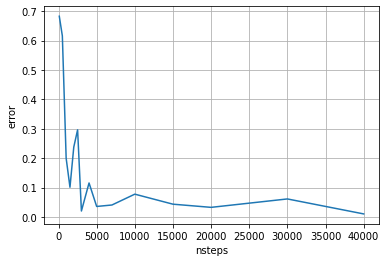

In [21]:
plt.plot(nsteps,error,'-')
    
plt.xlabel('nsteps')
plt.ylabel('error')
#plt.yscale('log')
plt.grid(axis='both')

## How does the error depend on the initial condition for q?

## How does the error depend on the choice of Delta?

[0.01544920670230307, 0.008405862761831412, 0.03650869065733267, 0.038576702706609824, 0.37522965300239014, 0.42875197387927544, 0.9040752749160612, 0.9733786636621583, 1.0444744847528171, 1.0988416487104882, 0.9634410818597171, 1.0229880187786242, 0.973971918992875, 1.0269425816129811, 0.9405326315790097, 1.1422962918475035, 0.9699192397912895, 0.9050658665431527, 1.3580252504024355]
[1.0, 1.0, 1.0, 0.9986, 0.9972, 0.9928, 0.981, 0.96, 0.9016, 0.808, 0.6314, 0.4828, 0.3934, 0.321, 0.1558, 0.0774, 0.0552, 0.0408, 0.0338]


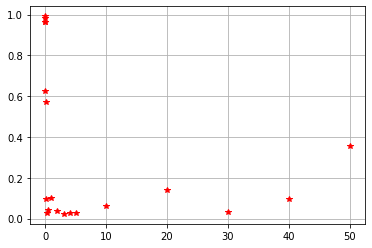

In [57]:
# How does the error depend on the choice of delta?
q2s=[]
error=[]
q2stds=[]
avalphas=[]
nsteps=5000
deltas=(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,3,4,5,10,20,30,40,50)
#deltas=(0.05,0.1,0.2,0.5,1,2,3,4,5)

for delta in deltas:  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    error.append(np.abs(1-np.mean(traj**2)))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    #plt.plot(time,traj,'-',label=delta)
    
#plt.legend(loc='upper left')

print(q2s)
plt.plot(deltas,error,'*r')
plt.grid(axis='both')
#plt.yscale('log')
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

## Find the optimal value of ∆ that allows to obtain the most accurate result in the shortest time.

[[9.87709050e-01 9.93592957e-01 9.79687026e-01 9.93728231e-01
  9.05165156e-01 6.76557489e-01 8.13565510e-01 7.89137475e-01
  1.60729200e-01 5.67998015e-02 9.98896235e-02 8.80651301e-02
  2.48598173e-02 1.46967924e-01 2.26758244e-01 2.29584204e-01]
 [9.90760242e-01 9.95352828e-01 9.92154092e-01 9.46386983e-01
  9.63188543e-01 9.07000316e-01 6.34987893e-01 4.98579059e-01
  2.60943416e-01 1.27098228e-01 7.67424730e-02 1.02788740e-01
  2.05088816e-02 1.16633578e-02 9.08330401e-02 1.64057855e-01]
 [9.93912373e-01 9.70882504e-01 9.74583429e-01 6.98011328e-01
  8.51753117e-01 8.03776001e-01 1.15382092e-02 2.61519849e-01
  7.49891899e-02 7.44601476e-03 2.70253529e-02 1.10458174e-01
  1.98320175e-02 4.68577955e-02 2.03666919e-02 9.78827648e-02]
 [9.86456400e-01 9.81955787e-01 9.75762280e-01 8.80945282e-01
  8.10969151e-01 1.49477555e+00 2.51126992e-01 3.16029885e-02
  1.26049237e-01 4.25214466e-02 9.42457679e-03 4.97304779e-03
  2.42774164e-02 4.63898731e-02 5.55486000e-03 2.55608519e-02]
 [9.

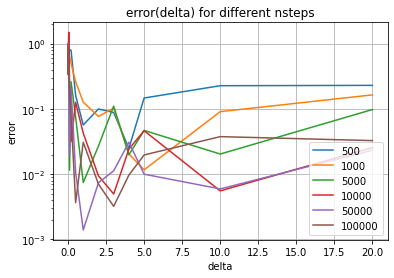

In [25]:
nsteps=(500,1000,5000,10000,50000,100000)
deltas=(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,3,4,5,10,20)
a=len(nsteps)
b=len(deltas)

q2s=np.zeros((a,b))
error=np.zeros((a,b))
q2stds=np.zeros((a,b))
avalphas=np.zeros((a,b))

#deltas=(0.05,0.1,0.2,0.5,1,2,3,4,5)

for i in range(a):
    for j in range(b):  
        time,traj,avalpha,q2=run(delta=deltas[j],nsteps=nsteps[i])
        avalphas[i,j]=avalpha
        q2s[i,j]=np.mean(traj**2)
        error[i,j]=np.abs(1-np.mean(traj**2))
        q2stds[i,j]=np.std(traj**2)/np.sqrt(nsteps[i])
    
    #plt.plot(time,traj,'-',label=delta)
    
#plt.legend(loc='upper left')

#print(q2s)
print(error)
#plt.plot(deltas,error,'*r')
#plt.grid(axis='both')
#plt.yscale('log')
#print(avalphas)
for i in range(a):
    plt.plot(deltas,error[i,:],'-',label=nsteps[i])
plt.legend()
plt.xlabel('delta')
plt.ylabel('error')
plt.yscale('log')
plt.title('error(delta) for different nsteps')
plt.grid(axis='both')

In [126]:
a=np.zeros((10,5))
for i in range(10):
    for j in range(5):
        a[i,j]=j
print(a)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


In [27]:
# block analysis: the best way to estimate statistical errors
error=[]
nblocks=100000
bss=[10,20,50,100,1000]
for bs in bss: # block size
    error.append(np.std(np.average(np.average(traj**2).reshape((-1,bs)),axis=1))/np.sqrt(nblocks))
# computed as if they are independent: std/sqrt(N)


ValueError: cannot reshape array of size 1 into shape (10)